In [1]:
from sklearn import datasets

In [2]:
diabetes_dataset=datasets.load_diabetes()

In [3]:
X=diabetes_dataset.data
y=diabetes_dataset.target

In [4]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [5]:
from sklearn.decomposition import PCA
# Instanciando decomposição do PCA
# Transforma multiplas dimensões em menos
pca=PCA(n_components=2)

In [6]:
X_pca=pca.fit_transform(X)

In [7]:
from sklearn.cluster import KMeans

In [26]:
# Make k-means clusterer
# Separando em 3 grupos (3 clusteres) por similaridade
clusterer = KMeans(3, random_state=1)

# Fit clusterer
clusterer.fit(X_pca)

KMeans(n_clusters=3, random_state=1)

In [9]:
df=pd.DataFrame(X_pca,columns=['vetor1','vetor2'])
df.head(5)

,vetor1,vetor2
0,0.027931,-0.092601
1,-0.134686,0.065263
2,0.012945,-0.077764
3,0.002345,0.018182
4,-0.035981,0.038621


In [10]:
# Criar nova coluna 'grupo' baseada na predição do cluster
df['grupo']=clusterer.predict(X_pca)

In [11]:
# Cria nova coluna 'cor' e popula de acordo com o grupo
df['cor']=['green' if grupo==1 else grupo for grupo in df.grupo.values]
df['cor']=['red' if grupo==0 else grupo for grupo in df.cor.values]
df['cor']=['blue' if grupo==2 else grupo for grupo in df.cor.values]

In [12]:
df

,vetor1,vetor2,grupo,cor
0,0.027931,-0.092601,1,green
1,-0.134686,0.065263,0,red
2,0.012945,-0.077764,1,green
3,0.002345,0.018182,1,green
4,-0.035981,0.038621,0,red
...,...,...,...,...
437,0.058958,-0.049275,1,green
438,0.060155,0.036211,2,blue
439,-0.009763,-0.057337,1,green
440,0.032956,0.009994,1,green


<AxesSubplot:xlabel='vetor1', ylabel='vetor2'>

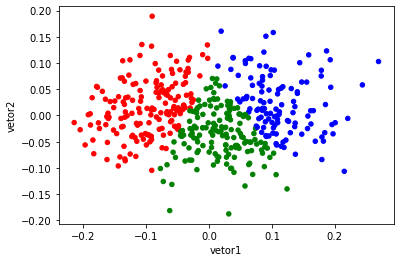

In [13]:
df.plot.scatter(x='vetor1',y='vetor2',c='cor')

In [14]:
df_original=pd.DataFrame(X)
df_original['diabetes']=y

In [15]:
df_original['grupo']=df.grupo

In [27]:
df_original

,0,1,2,3,4,5,6,7,8,9,diabetes,grupo
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,1
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0,1
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0,2
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0,1
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0,1


In [16]:
grupo1=df_original[df_original.grupo==1]

In [17]:
# Média de glicos
grupo1.diabetes.mean()

164.53548387096774

In [18]:
grupo2=df_original[df_original.grupo==2]

In [19]:
grupo2.diabetes.mean()

197.725

In [20]:
grupo3=df_original[df_original.grupo==0]

In [21]:
grupo3.diabetes.mean()

107.8622754491018

In [22]:
grupo3.iloc[:,0].mean()

-0.02439505423321161

In [23]:
grupo1.iloc[:,0].mean()

0.008546884186426391

In [24]:
grupo1.iloc[:,0]

0      0.038076
2      0.085299
3     -0.089063
8      0.041708
9     -0.070900
         ...   
430   -0.009147
431    0.070769
437    0.041708
439    0.041708
440   -0.045472
Name: 0, Length: 155, dtype: float64

In [25]:
print(diabetes_dataset.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va